In [29]:
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
# Load the dataset
titanic_data = pd.read_csv('Titanic-Dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# Check for null values in dataset
check_data = titanic_data.isnull().sum()
check_data

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [32]:
# Data Cleaning and Preprocessing
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
titanic_data.drop(columns=['Cabin'], inplace=True)

In [33]:
check_data = titanic_data.isnull().sum()
check_data

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [34]:
# Convert categorical variables to numerical format
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [35]:
# Drop irrelevant columns
titanic_data_cleaned = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [36]:
# Separate features and target
X = titanic_data_cleaned.drop(columns=['Survived'])
y = titanic_data_cleaned['Survived']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Build the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [39]:
# Predict on the test set
y_pred = model.predict(X_test)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.81
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



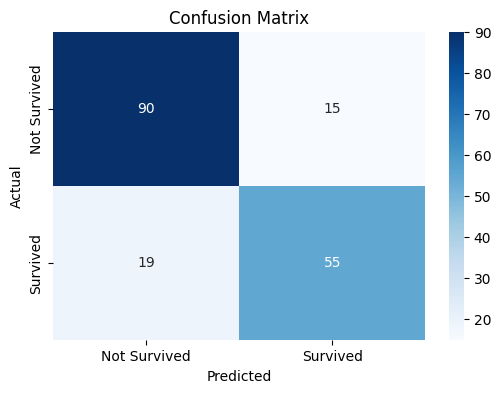

In [41]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
# Generate the classification report as a dictionary
class_report = classification_report(y_test, y_pred, output_dict=True)

In [43]:
# Convert it to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Display the DataFrame
print(class_report_df)

              precision    recall  f1-score     support
0              0.825688  0.857143  0.841121  105.000000
1              0.785714  0.743243  0.763889   74.000000
accuracy       0.810056  0.810056  0.810056    0.810056
macro avg      0.805701  0.800193  0.802505  179.000000
weighted avg   0.809163  0.810056  0.809193  179.000000


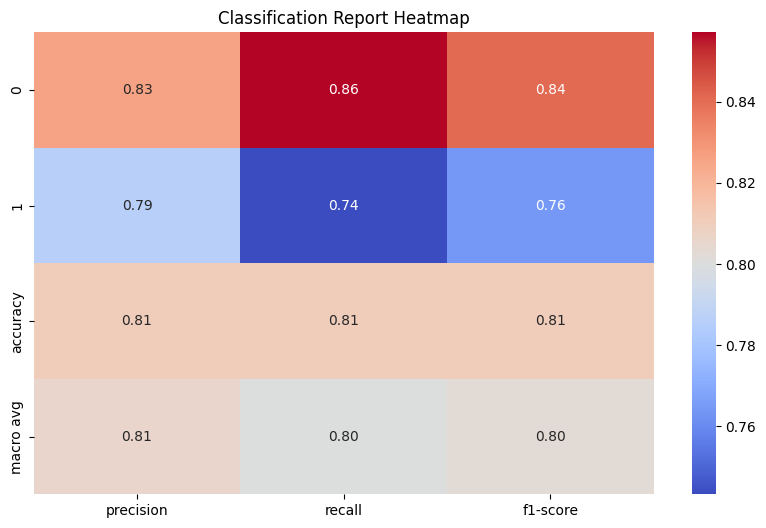

In [44]:
# Classification Report Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Classification Report Heatmap")
plt.show()